# Day 3

## (A) NumPy Arrays

Yesterday, we ended our session with what we call a `list` in Python. It stores multiple different values in a single `list` variable, and we could access individual element(s) using some good old 0-based indexing.

*However*, there are some common operations that we want in scientific computing that just doesn't exist for lists. For example, applying even a very simple function (say `*2`) to all values in the list requires something like:

In [1]:
a = [3, 4, 1, 5, 6]
b = []

for elem in a:
    b.append(elem*2)

print(b)
# Note that this doesn't work... not the way we want it
print(a*2)

[6, 8, 2, 10, 12]
[3, 4, 1, 5, 6, 3, 4, 1, 5, 6]


That is just for multiplication. More complicated things like `math.sin(a)` will not even work. There's got to be **a better way** to do this type of computation, right? We don't want to write that `for` loop every single time.

That is where `NumPy` package comes in. `NumPy`, which I might write as `np` sometimes, has some really useful **data structures and functions useful for scientific computing**. It is truly one of the big reasons why Python is so good.

### NumPy Arrays

`np` arrays are just like lists in its basic form. However, it understands some mathematical functions in the way *we* want it to.

In [2]:
import numpy as np

a = np.array([1, 2, 3])
b = a*2
c = a * b

print(a)
print(b)
print(c)

[1 2 3]
[2 4 6]
[ 2  8 18]


If `np` is told to compute some value using a `np` array and a scalar value, it just applies the scalar value all across the array; above, we doubled each element of `a` to compute `b`. However, if `np` is told to compute values using two `np` arrays, it first checks the **shapes** of the two input arrays; if the shapes are the same, it carries out the computation **element-wise**.

Isn't that smart?!

Not only is `np` array calculations easier to write and understand than explicit for loops, they are also **much much faster**.

In [3]:
import math

def list_sin(x_list):
    y_list = []
    for x in x_list:
        y_list.append(math.sin(x))
    return y_list

def list_square(x_list):
    y_list = []
    for x in x_list:
        y_list.append(x * x)
    return y_list

data = list(range(100000))
data_np = np.array(data)

In [4]:
print("Computing sin(x)...")
%timeit -n50 list_sin(data)
%timeit -n50 np.sin(data_np)
print("Squaring...")
%timeit -n50 list_square(data)
%timeit -n50 data_np * data_np

Computing sin(x)...
23.3 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)
3.86 ms ± 38.7 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
Squaring...
9.71 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)
63.8 µs ± 18.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


(If you are curious of why `np` is so much faster, google the concept "vectorization" and read more about it.)

**TL DR: Use `NumPy` whenever possible, avoid explicit `for` loops whenever possible**

#### Exercise

Write a function `radius` that takes two input `np` arrays with an equal length: `x` and `y`. Return a `np` array each of whose value is $r = \sqrt{x^2 + y^2}$ for each $x,y$ from the input arrays. Do not use *any* `for` loop.

Hint: `np.sqrt` is a thing.  
Hint: This can be done in one line.

In [5]:
def radius(x, y):
    ##################################
    # Write your own code here!      #
    ##################################
    return np.sqrt(x*x + y*y)

In [6]:
# Don't worry about how the input data are created here...
# We'll get to these later
x = np.cos(np.linspace(0, 2*np.pi, 100))
y = np.sin(np.linspace(0, 2*np.pi, 100))
r = radius(x, y)

# These should all be 1's
print(r)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


#### Creating `np` arrays

`np` arrays are not only faster to do computations with, but they are also often easier to create and manipulate otherwise.

Above, we saw a construction of a `np` array using `np.array(some_list)`. Some other ways include:

In [7]:
a = np.zeros(10)
print("a is:\n", a)

b = np.ones(10)
print("b is:\n", b)

a is:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b is:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


And, of course, `np` has some generalizations of the `range` function:

In [8]:
c = np.arange(50)
print("c is:\n", c)

d = np.arange(30, 50)
print("d is:\n", d)

e = np.arange(4, 38, 2.5)
print("e is:\n", e)

c is:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
d is:
 [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
e is:
 [ 4.   6.5  9.  11.5 14.  16.5 19.  21.5 24.  26.5 29.  31.5 34.  36.5]


Sometimes, `np.linspace()` is more convenient than `np.arange()`.

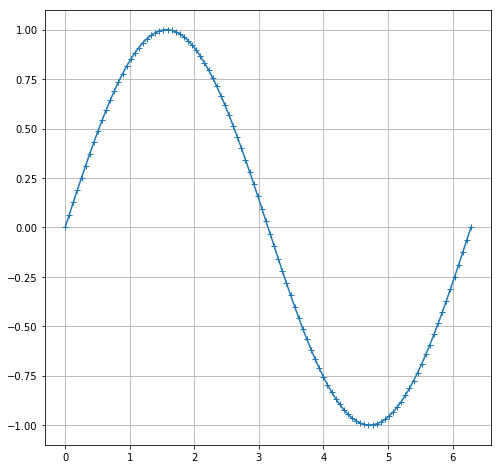

In [10]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(x, y, marker='+')
plt.grid(True)
plt.show()

If there is `linspace`, there must also be `logspace`, right?

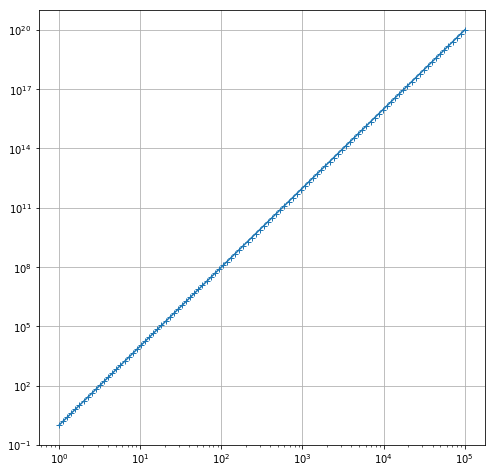

In [11]:
x = np.logspace(0, 5, 100)
y = x ** 4

plt.figure(figsize=(8, 8))
plt.loglog(x, y, marker='+')
plt.grid(True)
plt.show()

#### Multi-dimensional `np` arrays

Remebmer how we created a nested list yesterday (a list of lists)? The same can be done with `np` arrays. In fact, we can make **arbitray-dimension arrays**.

In [12]:
two_d_array = np.ones((4, 3))
print(two_d_array)

three_d_array = np.ones((4, 5, 3))
print(three_d_array)

# ... how about I stop here

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


`nparray.shape` is a special function that returns the shape (size per dimension) in something called a `tuple`. `tuple` is very similar to `list`, but is written with parentheses and not square-brackets.

In [13]:
print(two_d_array.shape)
print(two_d_array.shape[0])
print(two_d_array.shape[1])

print(three_d_array.shape)
print(three_d_array.shape[0])
print(three_d_array.shape[1])
print(three_d_array.shape[2])

(4, 3)
4
3
(4, 5, 3)
4
5
3


Indexing and slicing `np` arrays work just similarly as they do for lists.

In [14]:
a = np.array(
    [ [5, 3, 8, 4],
      [4, 3, 9, 3],
      [3, -2, -5, 0] ]
)

print("Accesing the first dimension")
print(a[0])
print("Accessing the second dimension")
print(a[0][2])  # Works, but not recommended!
print(a[0, 2])
print("Selecting the whole dimension using `:`")
print(a[:, 0])  # This is super-convenient
print("Can you understand what's happening here?")
print(a[:2, 1:])

Accesing the first dimension
[5 3 8 4]
Accessing the second dimension
8
8
Selecting the whole dimension using `:`
[5 4 3]
Can you understand what's happening here?
[[3 8 4]
 [3 9 3]]


#### Exercise

Write two functions `row_mean` and `column_mean`. Your input is one 2-dimensional `np` array, `x`. `row_mean` should compute **average across each row** (i.e. the last dimension), and `column_mean` should compute **average across column** (i.e. the first dimension). Your outputs should both be one-dimensional `np` array.

e.g.,
```Python
x = np.array(
    [ [1, 2, 3],
      [3, 2, 7] ] 
)
print(row_mean(x))
print(column_mean(x))

[ 2, 4 ]
[ 2, 2, 5]
```
and
```Python
x = np.array(
    [ [ 3, 4, 4, 9],
      [ 2, 1, 7, 0],
      [ 4, -5, 7, 0 ] ]
)
print(row_mean(x))
print(column_mean(x))

[ 5,  2.5, 1.5]
[ 3, 0, 6, 3 ]
```

You are allowed to use **only one explicit `for` loop**.

Hint: Start by creating a zero-array of the correct output shape using `np.zeros(shape)`. Then, over-write the correct mean values you compute from *each* row or column. For each row/column, you can use `np.mean(some_array)`.

In [15]:
def row_mean(x):
    ##################################
    # Write your own code here!      #
    ##################################
    out = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        out[i] = np.mean(x[i])
    return out

def column_mean(x):
    ##################################
    # Write your own code here!      #
    ##################################
    out = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        out[i] = np.mean(x[:, i])
    return out

In [16]:
x = np.array(
    [ [ 3, 4, 4, 9],
      [ 2, 1, 7, 0],
      [ 4, -5, 7, 0 ] ]
)
print(row_mean(x))
print(column_mean(x))

[5.  2.5 1.5]
[3. 0. 6. 3.]


`np.mean()` has an **optional argument `axis`**. The above could have been done in a more `np`-friendly way using the `axis` argument. This is faster, since it does not involve any explicit `for` loop.

(Most `np` functions that requires going through a *part* of a `np` array has the `axis` optional argument e.g., `np.max()`, `np.sum()`, etc. Check the documentation before you use any of these functions.)

In [17]:
print(np.mean(x, axis=1))
print(np.mean(x, axis=0))

%timeit -n100 row_mean(x)
%timeit -n100 np.mean(x, axis=1)

%timeit -n100 column_mean(x)
%timeit -n100 np.mean(x, axis=0)

[5.  2.5 1.5]
[3. 0. 6. 3.]
45.3 µs ± 8.31 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.2 µs ± 1.77 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
42.6 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
9.48 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### More advanced array indexing

You can also use other lists or `np` arrays as *indices* to your array.

In [18]:
array1 = np.array([4, 3, 4, 6, 1, 8, 2, 7])
index1 = [0, 2, 3, 6, -1]
print(array1[index1])

[4 4 6 2 7]


It is often very convenient to use *boolean* arrays to select elements from your array.

In [19]:
data = np.array(
    [ [32.41, 22.57, 21.99, 28.1],
      [-0.83, 2.1, 44.82, 32.11],
      [99894, 15.8, 38.72, 11.58] ]
)

print(data[data > 0])

[3.2410e+01 2.2570e+01 2.1990e+01 2.8100e+01 2.1000e+00 4.4820e+01
 3.2110e+01 9.9894e+04 1.5800e+01 3.8720e+01 1.1580e+01]


The old `not`, `&`, `|` don't work for arrays of boolens. Use `np.logical_not(x)`, `np.logical_and(x, y)`, and `np.logical_or(x, y)` instead.

In [20]:
print(data[ np.logical_and(data > 0, data < 10000) ])

[32.41 22.57 21.99 28.1   2.1  44.82 32.11 15.8  38.72 11.58]


#### Exercise

Suppose we do some observational astronomy project. Every night, we point our telescope to one specific source; we record some **characteristic wavelength of light (in nm) and the duration** (in seconds) over which we made the observation. These data are recorded in `wavelength` and `duration` arrays.

We want to compute the mean wavelength of the source. *However*, we want to **ignore some bad-quality data**. In computing your average, ignore all negative wavelength measurements (detector malfunction) and any nights where the observation time was too short (less than 1 minute).

Write a function `mean_obs_wavelength` that implements this calculation. Do **NOT** use any explicit `for` loops.

In [21]:
def mean_obs_wavelength(wavelength, duration):
    return np.mean(wavelength[ np.logical_and(wavelength > 0, duration > 60) ])

In [22]:
obs = np.array(
    [500, 630, 701, -3, 850, 600, 425, 351, -1, 951, 952, 882, -4, 869])
time = np.array(
    [58, 1030, 580, 5, 923, 94, 28, 29, 12, 4914, 96, 846, 8429, 1848])

print(mean_obs_wavelength(obs, time))

804.375


#### Broadcasting `NumPy` Arrays

Suppose you are doing some basic experiment that involves electronics. You data look like:
```Python
volt = np.array(
    [ [4.3, 2.5, 4.3, 3.8, 3.6, 2.9],
      [8.8, 6.0, 7.5, 9.2, 9.1, 6.0],
      [27.0, 35.1, 28.3, 27.3, 24.8, 30.1] ]
)

resi = np.array(
    [ 2, 5, 10]
)
```

Here is what your data represent. You have 3 samples, each with resistance $2, 5, 10 \Omega$. Across each sample, you measured the voltage across it 6 times; these measurements are represented by each row (second dimension) in the `volt` array.

Suppose we want to calculate the current through the sample corresponding to the each voltage measurement.

In [23]:
volt = np.array(
    [ [4.3, 2.5, 4.3, 3.8, 3.6, 2.9],
      [8.8, 6.0, 7.5, 9.2, 9.1, 6.0],
      [17.0, 25.1, 14.3, 11.3, 12.8, 16.1] ]
)

resi = np.array(
    [ 2, 5, 10]
)

curr = volt / resi

ValueError: operands could not be broadcast together with shapes (3,6) (3,) 

Because `resi` is not a scalar, this operation **doesn't work** naturally. However, if `NumPy` is indeed so smart, there must be a good way of computing this, without having a for loop.

To do that, we need a way to tell Python, **"Hey, align the `resi` dimension along the *second* dimension of `volt`, and divide each *row* of `volt` by *each* element from `resi`."**

This is done like the following:

In [24]:
print(resi[:, np.newaxis])

curr = volt / resi[:, np.newaxis]

print(curr)
print(curr.mean(axis=1))
print(curr.std(axis=1))

[[ 2]
 [ 5]
 [10]]
[[2.15 1.25 2.15 1.9  1.8  1.45]
 [1.76 1.2  1.5  1.84 1.82 1.2 ]
 [1.7  2.51 1.43 1.13 1.28 1.61]]
[1.78333333 1.55333333 1.61      ]
[0.33623735 0.27341462 0.44530888]


#### Down-side of `NumPy` Arrays

`np` arrays are *not* completely perfect. There are some aspects that are not so wonderful.

First, it **cannot change in shape**. There is no `arr.append(x)`, unlike lists. To do this, you will need to go back to lists. Something like:
```Python
list_data = []
# Append whatever data you want here
# and then create the array
list_array = np.array(list_data)
```
Or use `np.concatenate`. `np` can join two `np` arrays to return another one. You can concatenate your existing array with an array of additional data, and overwrite with the concatenated array.
```Python
data = some_experimental_data_as_np_array
x = new_measurement_to_add
# data.append(data) doesn't work, because data is not a list
# but this works!
data = np.concatenate( (data, np.array(x)) )
```

Second, `np` arrays have to be *cubic* in shape. Along one dimension of a `np` array, the shapes of each element cannot be different.

In [25]:
# Suppose you added some measurement
volt = np.array(
    [ [4.3, 2.5, 4.3, 3.8, 3.6, 2.9, 3.8, 2.6, 3.2],
      [8.8, 6.0, 7.5, 9.2, 9.1, 6.0, 3.1, 2.1],
      [17.0, 25.1, 14.3, 11.3, 12.8, 16.1] ]
)

print(volt)

curr = volt / resi[:, np.newaxis]

[list([4.3, 2.5, 4.3, 3.8, 3.6, 2.9, 3.8, 2.6, 3.2])
 list([8.8, 6.0, 7.5, 9.2, 9.1, 6.0, 3.1, 2.1])
 list([17.0, 25.1, 14.3, 11.3, 12.8, 16.1])]


TypeError: unsupported operand type(s) for /: 'list' and 'int'

To work around this, *padding* is a good trick. Pad your input list with some special values, and skip them for actual data analysis 

In [26]:
volt = np.array(
    [ [4.3, 2.5, 4.3, 3.8, 3.6, 2.9, 3.8, 2.6, 3.2],
      [8.8, 6.0, 7.5, 9.2, 9.1, 6.0, 3.1, 2.1, -100],
      [17.0, 25.1, 14.3, 11.3, 12.8, 16.1, -100, -100, -100] ]
)

print(volt)

[[   4.3    2.5    4.3    3.8    3.6    2.9    3.8    2.6    3.2]
 [   8.8    6.     7.5    9.2    9.1    6.     3.1    2.1 -100. ]
 [  17.    25.1   14.3   11.3   12.8   16.1 -100.  -100.  -100. ]]
